# Image Loading

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 88kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 9.1MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

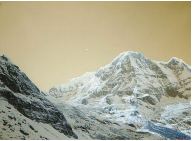

<Figure size 720x576 with 0 Axes>

In [ ]:
# Read a the first view image
plt.figure(figsize = (10,8))
left_org = cv2.imread('/images/Image1.PNG')
left = cv2.cvtColor(left_org,cv2.COLOR_BGR2RGB)
cv2_imshow(left)

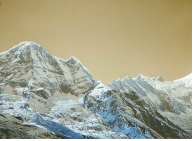

<Figure size 720x576 with 0 Axes>

In [ ]:
# Read a the second view image
plt.figure(figsize = (10,8))
right_org = cv2.imread('/images/Image2.PNG')
right = cv2.cvtColor(right_org,cv2.COLOR_BGR2RGB)
cv2_imshow(right)

# Autmoatic interest point detection and local feature matching using SIFT

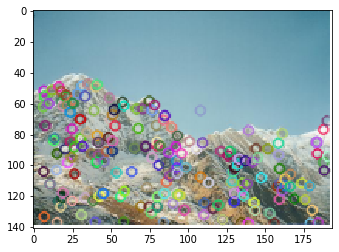

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(right,None)
img= cv2.drawKeypoints(right,kp,cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [ ]:
key_v1,des_v1 = sift.detectAndCompute(right,None)
key_v2, des_v2 = sift.detectAndCompute(left,None)

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_v1,des_v2, k=2)

all_matches = cv2.drawMatchesKnn(left,key_v1,right,key_v2,matches,None,flags=2)


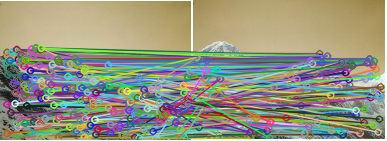

In [ ]:
cv2_imshow(all_matches)

In [ ]:
valid_matches=list()

for m,n in matches:
    if m.distance < 0.6*n.distance:
        valid_matches.append(m)
        

In [ ]:
print(len(valid_matches))
print(len(matches))

38
219


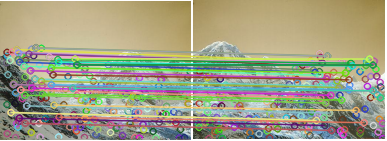

In [ ]:
matching_result = cv2.drawMatches(left, key_v1, right, key_v2, valid_matches, None)
cv2_imshow(matching_result)

In [ ]:
#src pts are from right image and dest points are left_image
src_pts = np.float32([ key_v1[m.queryIdx].pt for m in valid_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ key_v2[m.trainIdx].pt for m in valid_matches ]).reshape(-1,1,2)
# points1=src_pts.squeeze()
# points2=dst_pts.squeeze()

In [ ]:
# using cv2 to find Homography matrix
H, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

#manual homography matrix


In [ ]:

points1 = np.array([[  6.5507097,  51.80562  ],
       [ 10.505717 , 112.04769  ],
       [ 10.505717 , 112.04769  ],
       [ 11.80117  ,  51.518623 ],
       [ 13.01627  ,  84.0003   ],
       [ 13.01627  ,  84.0003   ],
       [ 16.268179 ,  49.049377 ],
       [ 17.849005 ,  52.275467 ],
       [ 17.924852 ,  58.849586 ],
       [ 18.751778 , 117.7644   ],
       [ 19.049725 ,  61.715393 ],
       [ 20.31414  ,  89.367584 ],
       [ 23.652426 ,  65.66132  ],
       [ 24.461311 ,  94.68601  ],
       [ 24.776033 , 122.84454  ],
       [ 26.30134  , 105.38471  ],
       [ 28.505358 ,  53.52917  ],
       [ 30.045088 ,  70.1876   ],
       [ 30.045088 ,  70.1876   ],
       [ 31.422995 ,  87.588554 ],
       [ 34.422886 ,  78.56371  ],
       [ 35.443836 ,  47.42669  ],
       [ 35.443836 ,  47.42669  ],
       [ 41.08541  ,  80.700554 ],
       [ 41.96485  ,  93.54914  ],
       [ 48.83272  ,  56.296238 ],
       [ 50.91281  ,  67.33002  ],
       [ 50.923187 ,  84.25579  ],
       [ 52.554077 ,  74.38946  ],
       [ 53.512848 , 104.63404  ]])
points2 = np.array([[109.090096,  64.80886 ],
       [123.008644, 120.02281 ],
       [123.008644, 120.02281 ],
       [113.685814,  63.55025 ],
       [120.008415,  93.3209  ],
       [120.008415,  93.3209  ],
       [117.19163 ,  60.50056 ],
       [118.99021 ,  63.24147 ],
       [120.093124,  69.45129 ],
       [131.38701 , 125.00279 ],
       [121.51875 ,  71.854866],
       [127.249855,  97.76829 ],
       [126.14553 ,  74.86242 ],
       [132.22293 , 102.58605 ],
       [138.07681 , 129.93744 ],
       [135.87137 , 112.575745],
       [128.68849 ,  62.346436],
       [132.88734 ,  78.37291 ],
       [132.88734 ,  78.37291 ],
       [137.24785 ,  94.8301  ],
       [138.54153 ,  85.69757 ],
       [133.95787 ,  55.602306],
       [133.95787 ,  55.602306],
       [145.37541 ,  87.01842 ],
       [148.16402 ,  99.57783 ],
       [148.32298 ,  61.807686],
       [152.13608 ,  72.33861 ],
       [155.52045 ,  89.1955  ],
       [155.47588 ,  79.29268 ],
       [162.54393 , 109.96817 ]])
print(p1.shape)
print(p2.shape)

(30, 2)
(30, 2)


In [ ]:
points1[0][1]

51.80562

In [ ]:
homogenous_matrix=np.array([[-points1[0][0],-points1[0][1],-1,0,0,0, points1[0][0]*points2[0][0] , points1[0][1]*points2[0][0] ,  points2[0][0] ] ])
for i in range(1,len(points1)):
  sub_matrix_1=np.array([[-points1[i][0],-points1[i][1],-1,0,0,0, points1[i][0]*points2[i][0] , points1[i][1]*points2[i][0] ,  points2[i][0] ] ])
  sub_matrix_2=np.array([[0,0,0, -points1[i][0] , -points1[i][1] , -1 , points1[i][0]*points2[i][1] , points1[i][1]*points2[i][1] ,  points2[i][1]] ])
  
  
  homogenous_matrix=np.concatenate((homogenous_matrix,sub_matrix_1,sub_matrix_2),axis=0)

In [ ]:
U,S,Vh=np.linalg.svd(homogenous_matrix)
L=Vh[-1,:]/Vh[-1,-1]
homography_manual=L.reshape(3,3)
homography_manual

array([[ 6.00586010e-01,  1.25382617e-01,  9.57439376e+01],
       [-2.72266390e-01,  8.58929250e-01,  2.00530328e+01],
       [-1.84555390e-03, -3.17926754e-04,  1.00000000e+00]])

In [ ]:
H

array([[ 5.70105467e-01,  1.29272356e-01,  9.58118084e+01],
       [-2.92984734e-01,  8.59042895e-01,  2.03543328e+01],
       [-2.06353322e-03, -2.83854067e-04,  1.00000000e+00]])

## orginal H matrix

In [ ]:
#the output size can't be bigger than the 2 images combined 
dsize = (right.shape[1] + left.shape[1], left.shape[0])

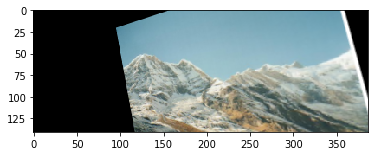

In [ ]:
# display image after being warped
dst = cv2.warpPerspective(right,H,dsize)
plt.imshow(dst)

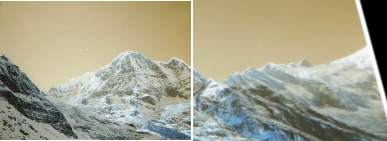

In [ ]:
dst[0:left.shape[0], 0:left.shape[1]] = left
cv2_imshow(dst)

## manual calcualted H

In [ ]:
dsize = (right.shape[1] + left.shape[1], left.shape[0])

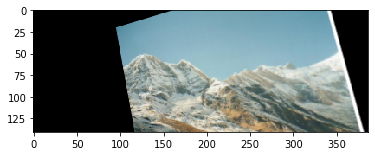

In [ ]:
dst = cv2.warpPerspective(right,homography_manual,dsize)
plt.imshow(dst)

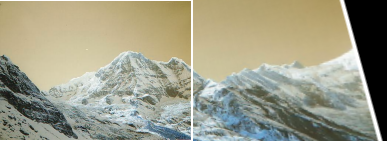

In [ ]:
dst[0:left.shape[0], 0:left.shape[1]] = left
cv2_imshow(dst)

# Other Examples

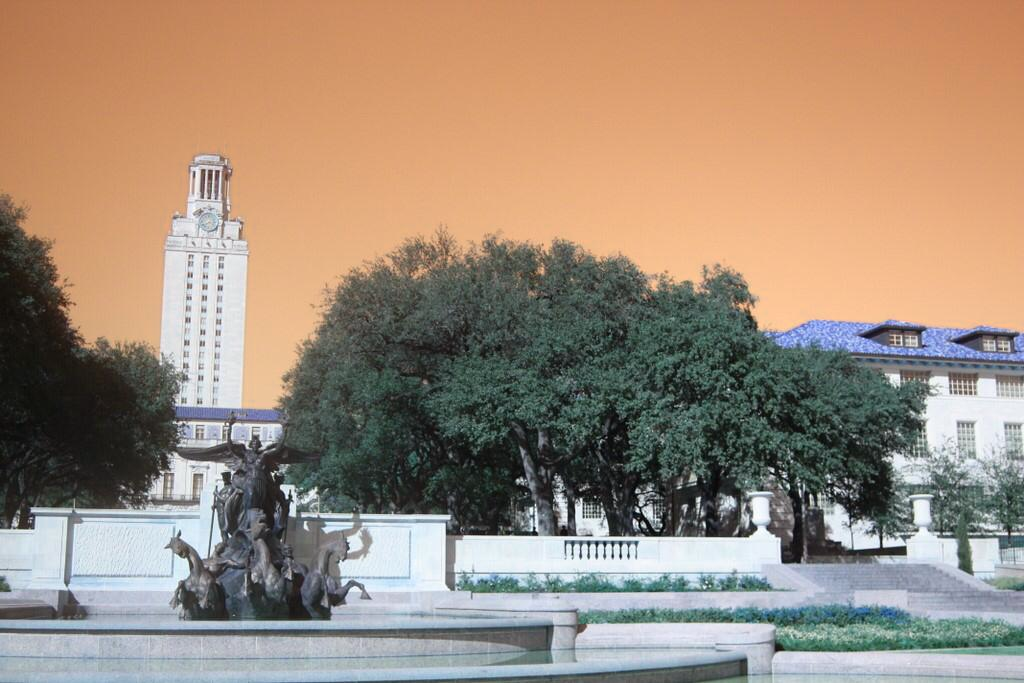

In [ ]:
# Read a the first view image
# plt.figure(figsize = (10,8))
left_org = cv2.imread('/content/drive/My Drive/Image Mosiac/Image4.jpg')
left = cv2.cvtColor(left_org,cv2.COLOR_BGR2RGB)
cv2_imshow(left)

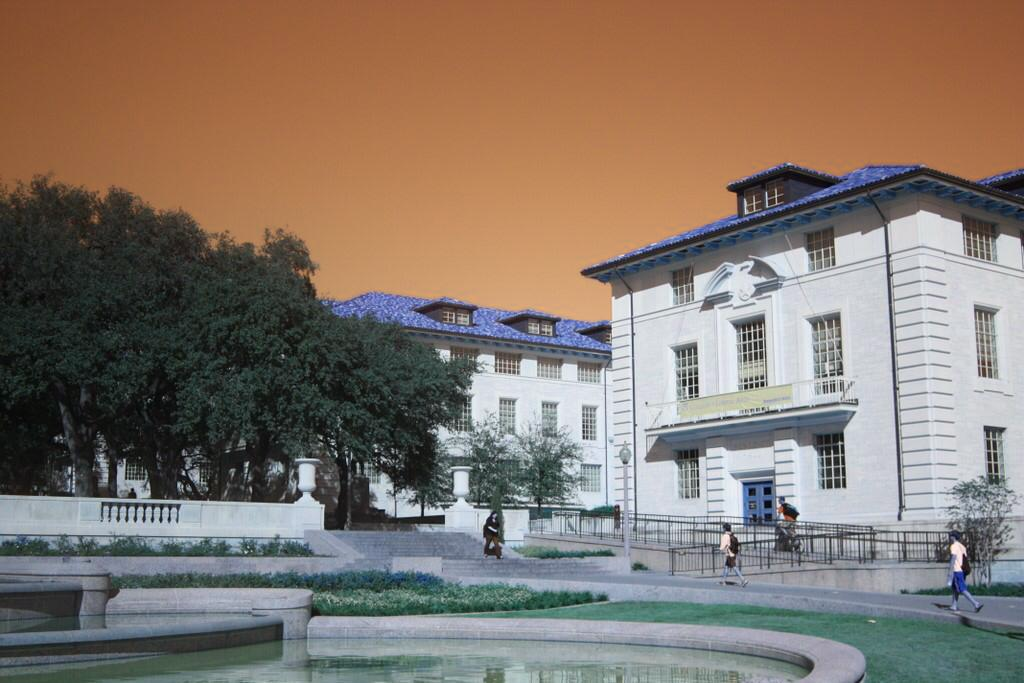

In [ ]:
# Read a the second view image
# plt.figure(figsize = (10,8))
right_org = cv2.imread('/content/drive/My Drive/Image Mosiac/Image3.jpg')
right = cv2.cvtColor(right_org,cv2.COLOR_BGR2RGB)
cv2_imshow(right)

## Using SIFT

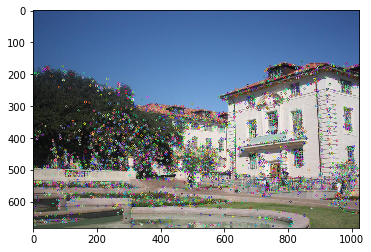

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(right,None)
img= cv2.drawKeypoints(right,kp,cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [ ]:
key_v1,des_v1 = sift.detectAndCompute(right,None)
key_v2, des_v2 = sift.detectAndCompute(left,None)

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_v1,des_v2, k=2)

all_matches = cv2.drawMatchesKnn(left,key_v1,right,key_v2,matches,None,flags=2)

valid_matches=list()

for m,n in matches:
    if m.distance < 0.6*n.distance:
        valid_matches.append(m)
        

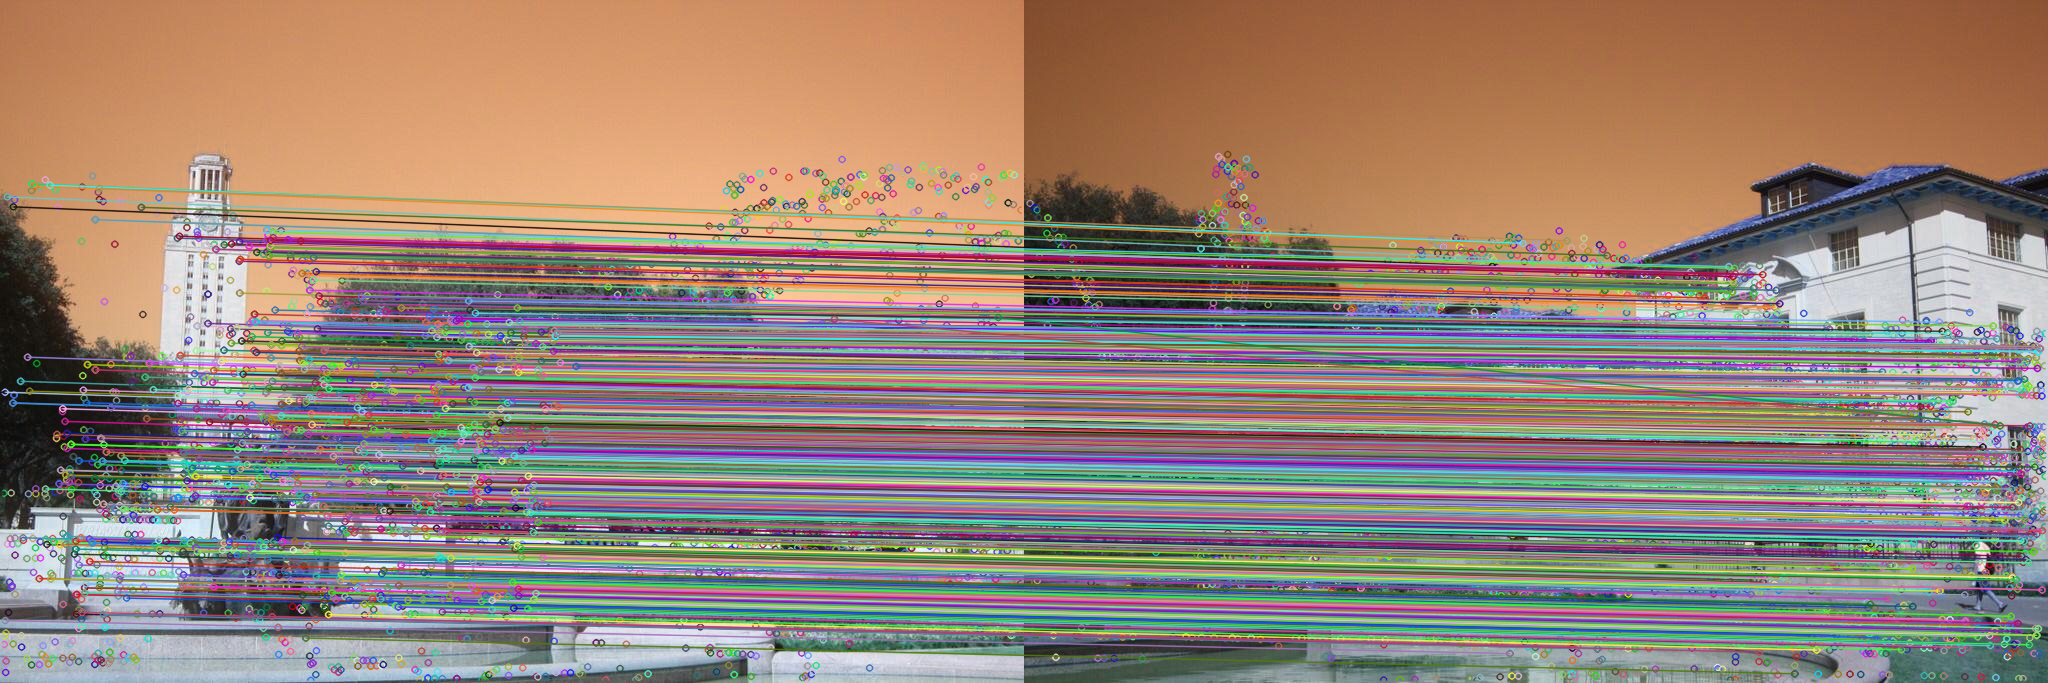

In [ ]:
matching_result = cv2.drawMatches(left, key_v1, right, key_v2, valid_matches, None)
cv2_imshow(matching_result)

In [ ]:
#src pts are from right image and dest points are left_image
src_pts = np.float32([ key_v1[m.queryIdx].pt for m in valid_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ key_v2[m.trainIdx].pt for m in valid_matches ]).reshape(-1,1,2)
H, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

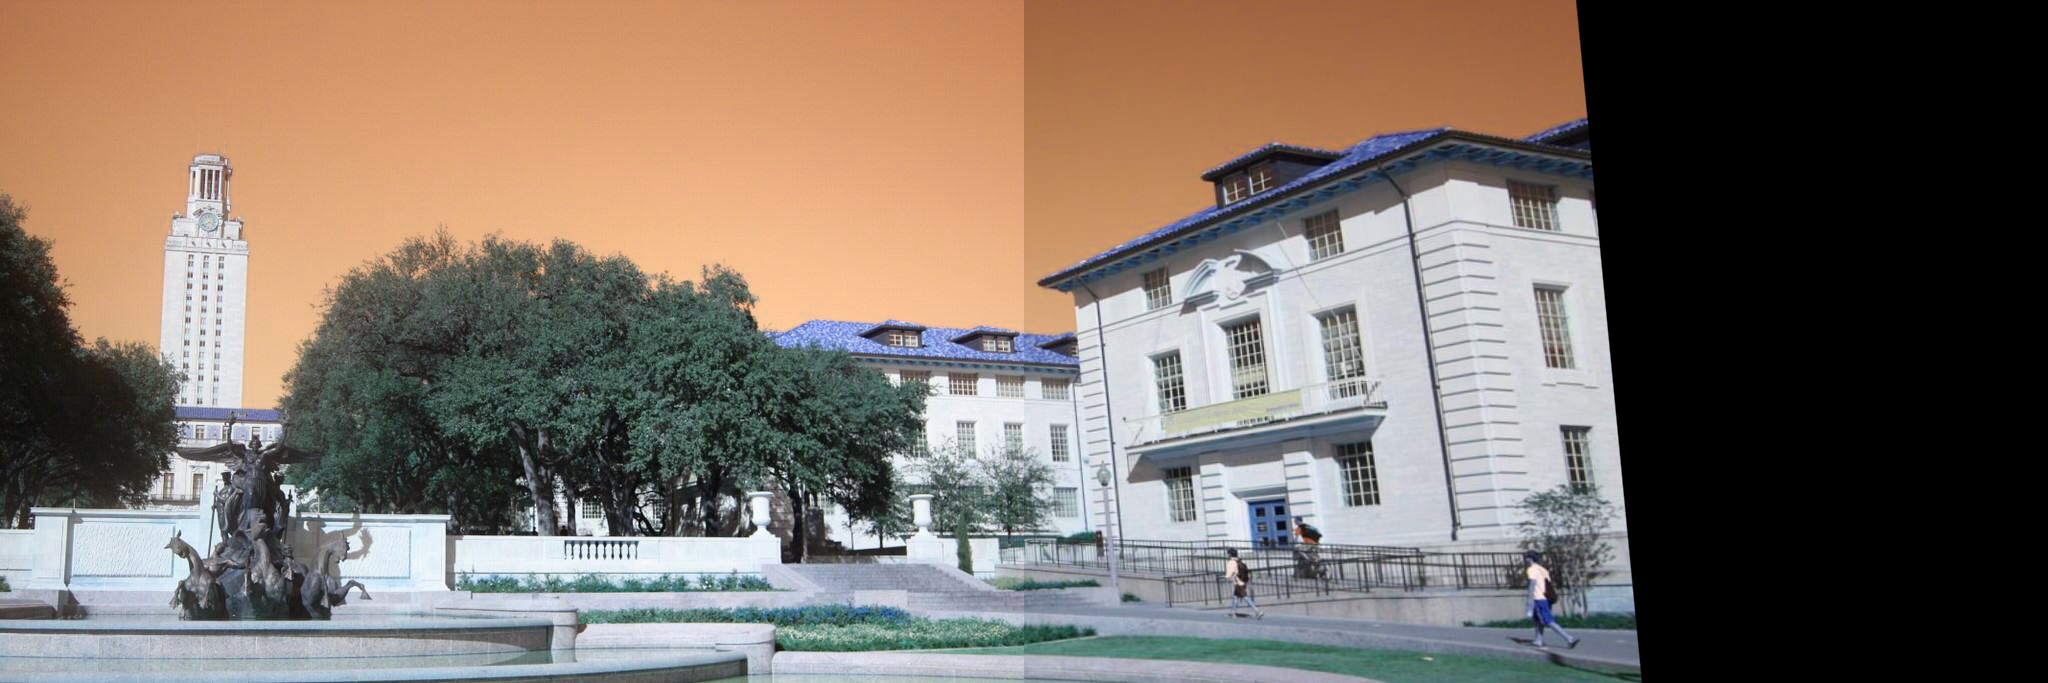

In [ ]:
#the output size can't be bigger than the 2 images combined 
dsize = (right.shape[1] + left.shape[1], left.shape[0])
dst = cv2.warpPerspective(right,H,dsize)
dst[0:left.shape[0], 0:left.shape[1]] = left
cv2_imshow(dst)